# Text detection and extraction using Pytesseract

In [1]:
# Set up

#!pip install opencv-python
#!pip install matplotlib
#!pip install fpdf

In [1]:
# Import modules

from PIL import Image
import pytesseract
from pytesseract import Output
import cv2
import matplotlib.pyplot as plt

In [2]:
# Read image
image = cv2.imread('fac_00168_arsberattelse_1939_sid-04.jpg')

In [3]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
# Apply a bilateral filter. 
# This filter smooths the image, reduces noise, while preserving the edges

bi_image = cv2.bilateralFilter(gray_image, 5, 75, 75)

In [5]:
# Thresholding/binarization (only if coloured image)
threshold_img = cv2.threshold(bi_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

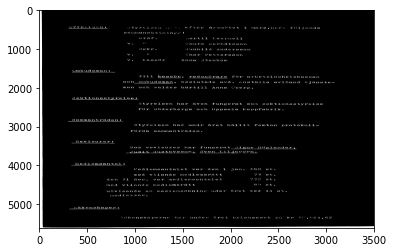

In [6]:
# Plot
imgplot = plt.imshow(threshold_img, aspect='auto', cmap='Greys')
plt.show()

In [7]:
#configure parameters for pytesseract
custom_config = r'--oem 3 --psm 6'    #oem 3: Default; psm 6: Assume a single uniform block of text.

In [8]:
# Input image to tesseract
# Add language support for Swedish
img_details = pytesseract.image_to_data(threshold_img, output_type=Output.DICT, config=custom_config, lang='swe')
print(img_details.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [14]:
total_boxes = len(img_details['text'])

for sequence_number in range(total_boxes):
    if int(float(img_details['conf'][sequence_number])) >20:
        (x, y, w, h) = (img_details['left'][sequence_number], img_details['top'][sequence_number], img_details['width'][sequence_number],  img_details['height'][sequence_number])
        threshold_img = cv2.rectangle(threshold_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

In [ ]:
# Save text extracted output
filename = 'result_textExtract.png'
cv2.imwrite(filename, threshold_img)

In [ ]:
# Arrange the text
parse_text = []
word_list = []
last_word = ''
for word in img_details['text']:
    if word!='':
        word_list.append(word)
        last_word = word
    if (last_word!='' and word == '') or (word==img_details['text'][-1]):
        parse_text.append(word_list)
        word_list = []

In [13]:
import csv
with open('result_ocr.txt', 'w', newline = "", encoding='utf8') as file:
    csv.writer(file, delimiter=" ").writerows(parse_text)